In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
%cd ../..

/scratch/km817/iREC


In [4]:
import torch
import torch.distributions as dist
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
from rec.utils import kl_estimate_with_mc, plot_running_sum_2d, plot_2d_distribution, kl_estimate_with_mc, compute_variational_posterior
from tqdm.notebook import trange
#import seaborn as sns; sns.set(); sns.set_style('whitegrid')
import math
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [5]:
plt.rcParams.update({'font.weight': 'normal'})
plt.rcParams.update({'font.size': 16})
plt.rcParams.update({'lines.linewidth' : 2})

In [6]:
torch.set_default_tensor_type(torch.DoubleTensor)

In [7]:
from rec.beamsearch.Coders.Encoder_Variational import Encoder
from rec.beamsearch.distributions.CodingSampler import CodingSampler
from rec.beamsearch.distributions.VariationalPosterior import VariationalPosterior
from rec.beamsearch.samplers.GreedySampling import GreedySampler
from rec.OptimisingVars.VariationalOptimiser import VariationalOptimiser

In [8]:
torch.manual_seed(100)

qs = []
ps = []
dims = [1, 5, 10, 25, 50]
num_seeds = 1000
num_warmup_seeds = 150
random_seeds = torch.randint(low=0, high=10000, size=(num_seeds+num_warmup_seeds,))
for d in dims:
    rand_mat = torch.rand(size=(d,d))
    qs.append(dist.MultivariateNormal(loc= torch.ones(size=(d,)), covariance_matrix = torch.eye(d)))
    ps.append(dist.MultivariateNormal(loc=torch.zeros((d,)), covariance_matrix = torch.eye(d)))

In [9]:
from rec.beamsearch.Coders.Encoder_Variational import Encoder
from rec.beamsearch.distributions.CodingSampler import CodingSampler
from rec.beamsearch.distributions.VariationalPosterior import VariationalPosterior
from rec.beamsearch.samplers.GreedySampling import GreedySampler
from rec.OptimisingVars.VariationalOptimiser import VariationalOptimiser
import time

In [10]:
coding_sampler = CodingSampler
auxiliary_posterior = VariationalPosterior
selection_sampler = GreedySampler

In [11]:
omega = 5
initial_seed = 0
beamwidth = 1
epsilon = 0.
var_performance = torch.zeros((len(dims), num_seeds, 1))
var_times = torch.zeros((len(dims), num_seeds, 1))

for i, q in enumerate(qs):
    for j, seed in enumerate(random_seeds):
        start = time.time()
        enc = Encoder(q,
                      seed,
                     coding_sampler,
                     selection_sampler,
                     auxiliary_posterior,
                     omega,
                     beamwidth=beamwidth,
                     epsilon=epsilon,
                     prior_var=1.)
        z, _ = enc.run_encoder()
        perf = q.log_prob(z)
        end = time.time()
        run_time = end - start
        
        # lag at the start so wait 100 seeds before logging
        if j > num_warmup_seeds:
        # append stuff
            var_performance[i, j - num_warmup_seeds] = perf.item()
            var_times[i, j - num_warmup_seeds] = run_time

/scratch/km817/miniconda3/envs/Torch/lib/python3.8/site-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  /opt/conda/conda-bld/pytorch_1623448278899/work/aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)


In [12]:
from rec.beamsearch.Coders.Encoder import Encoder
from rec.beamsearch.distributions.CodingSampler import CodingSampler
from rec.beamsearch.distributions.EmpiricalMixturePosterior import EmpiricalMixturePosterior
from rec.beamsearch.samplers.GreedySampling import GreedySampler

In [13]:
coding_sampler = CodingSampler
auxiliary_posterior = EmpiricalMixturePosterior
selection_sampler = GreedySampler

In [14]:
omega = 5
initial_seed = 0
beamwidth = 1
epsilon = 0.
emp_1_performance = torch.zeros((len(dims), num_seeds, 1))
emp_1_times = torch.zeros((len(dims), num_seeds, 1))

for i, q in enumerate(qs):
    for j, seed in enumerate(random_seeds):
        start = time.time()
        enc = Encoder(q,
                      seed,
                     coding_sampler,
                     selection_sampler,
                     auxiliary_posterior,
                     omega,
                      n_samples_from_target=1,
                     beamwidth=beamwidth,
                     epsilon=epsilon,
                     prior_var=1.)
        z, _ = enc.run_encoder()
        perf = q.log_prob(z)
        end = time.time()
        run_time = end - start
        
        # lag at the start so wait 100 seeds before logging
        if j > num_warmup_seeds:
        # append stuff
            emp_1_performance[i, j - num_warmup_seeds] = perf.item()
            emp_1_times[i, j - num_warmup_seeds] = run_time

In [15]:
omega = 5
initial_seed = 0
beamwidth = 1
epsilon = 0.
emp_10_performance = torch.zeros((len(dims), num_seeds, 1))
emp_10_times = torch.zeros((len(dims), num_seeds, 1))

for i, q in enumerate(qs):
    for j, seed in enumerate(random_seeds):
        start = time.time()
        enc = Encoder(q,
                      seed,
                     coding_sampler,
                     selection_sampler,
                     auxiliary_posterior,
                     omega,
                      n_samples_from_target=10,
                     beamwidth=beamwidth,
                     epsilon=epsilon,
                     prior_var=1.)
        z, _ = enc.run_encoder()
        perf = q.log_prob(z)
        end = time.time()
        run_time = end - start
        
        # lag at the start so wait 100 seeds before logging
        if j > num_warmup_seeds:
        # append stuff
            emp_10_performance[i, j - num_warmup_seeds] = perf.item()
            emp_10_times[i, j - num_warmup_seeds] = run_time

In [16]:
omega = 5
initial_seed = 0
beamwidth = 1
epsilon = 0.
emp_100_performance = torch.zeros((len(dims), num_seeds, 1))
emp_100_times = torch.zeros((len(dims), num_seeds, 1))

for i, q in enumerate(qs):
    for j, seed in enumerate(random_seeds):
        start = time.time()
        enc = Encoder(q,
                      seed,
                     coding_sampler,
                     selection_sampler,
                     auxiliary_posterior,
                     omega,
                      n_samples_from_target=100,
                     beamwidth=beamwidth,
                     epsilon=epsilon,
                     prior_var=1.)
        z, _ = enc.run_encoder()
        perf = q.log_prob(z)
        end = time.time()
        run_time = end - start
        
        # lag at the start so wait 100 seeds before logging
        if j > num_warmup_seeds:
        # append stuff
            emp_100_performance[i, j - num_warmup_seeds] = perf.item()
            emp_100_times[i, j - num_warmup_seeds] = run_time

In [17]:
omega = 5
initial_seed = 0
beamwidth = 1
epsilon = 0.
emp_1000_performance = torch.zeros((len(dims), num_seeds, 1))
emp_1000_times = torch.zeros((len(dims), num_seeds, 1))

for i, q in enumerate(qs):
    for j, seed in enumerate(random_seeds):
        start = time.time()
        enc = Encoder(q,
                      seed,
                     coding_sampler,
                     selection_sampler,
                     auxiliary_posterior,
                     omega,
                      n_samples_from_target=1000,
                     beamwidth=beamwidth,
                     epsilon=epsilon,
                     prior_var=1.)
        z, _ = enc.run_encoder()
        perf = q.log_prob(z)
        end = time.time()
        run_time = end - start
        
        # lag at the start so wait 100 seeds before logging
        if j > num_warmup_seeds:
        # append stuff
            emp_1000_performance[i, j - num_warmup_seeds] = perf.item()
            emp_1000_times[i, j - num_warmup_seeds] = run_time

In [18]:
for q, p in zip(qs, ps):
    print(dist.kl_divergence(q, p))

tensor(0.5000)
tensor(2.5000)
tensor(5.)
tensor(12.5000)
tensor(25.)


In [19]:
emp_mean_times = [emp_1_times.mean(1), emp_10_times.mean(1), emp_100_times.mean(1), emp_1000_times.mean(1)]
emp_std_times = [emp_1_times.std(1), emp_10_times.std(1), emp_100_times.std(1), emp_1000_times.std(1)]
var_mean_times = var_times.mean(1)
var_std_times = var_times.std(1)

In [20]:
emp_mean_performance = [emp_1_performance.mean(1), emp_10_performance.mean(1), emp_100_performance.mean(1), emp_1000_performance.mean(1)]
emp_std_performance = [emp_1_performance.std(1), emp_10_performance.std(1), emp_100_performance.std(1), emp_1000_performance.std(1)]
var_mean_performance = var_performance.mean(1)
var_std_performance = var_performance.std(1)

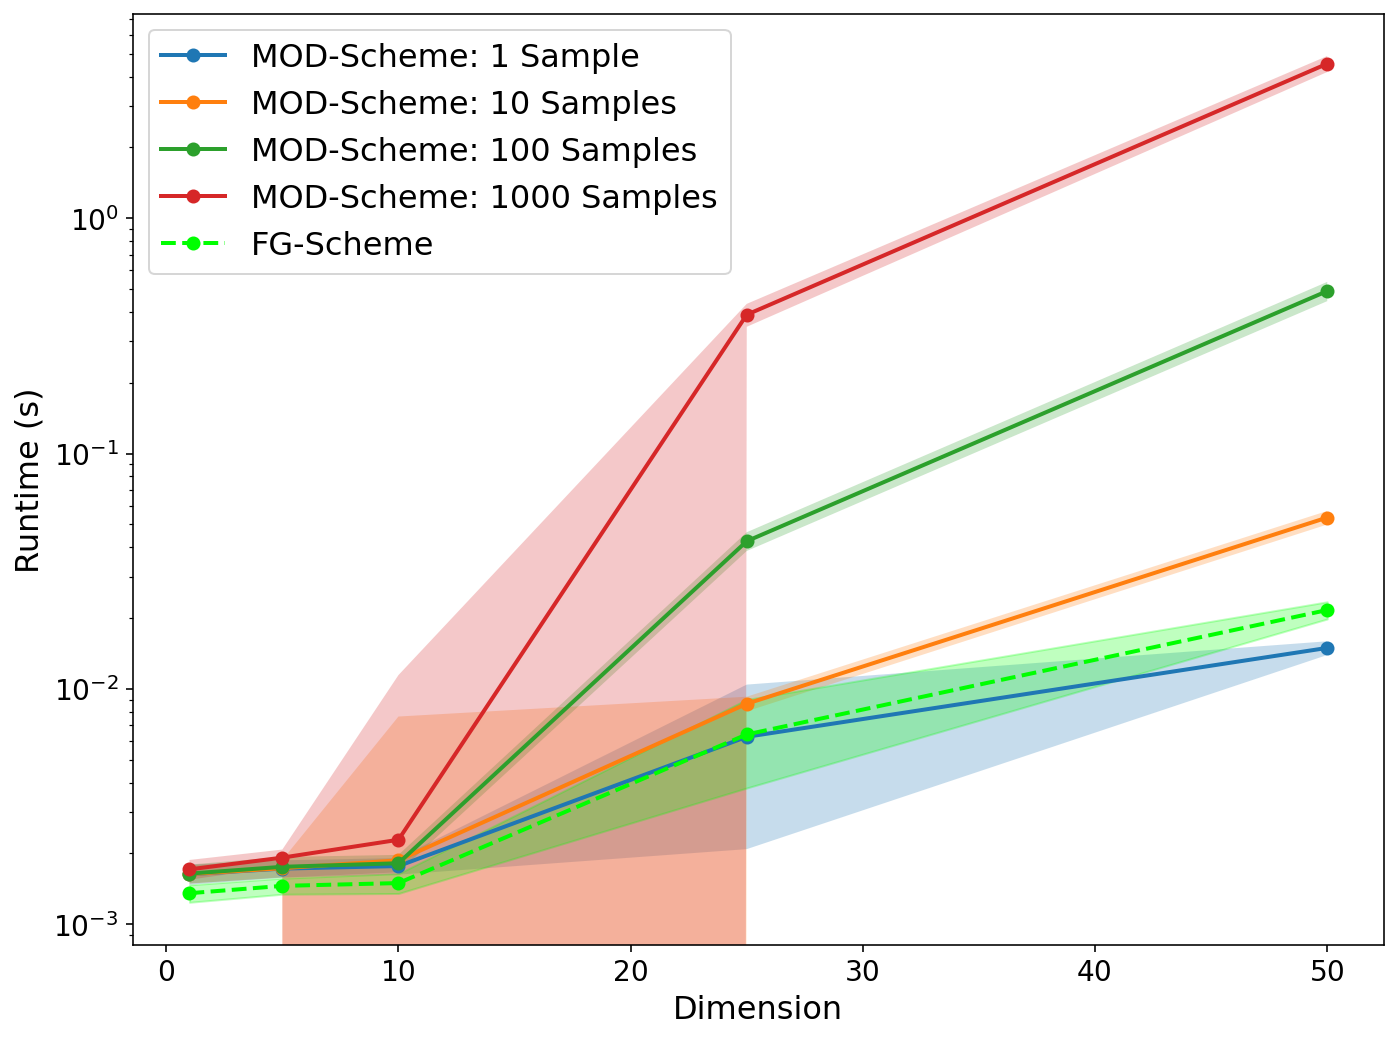

In [21]:
f, ax = plt.subplots(figsize=(10, 7.5))
fs = 16
for times, stds in zip(emp_mean_times, emp_std_times):
    ax.plot(dims, times, 'o-')
    ax.fill_between(dims, (times + stds * 2).flatten(), (times - stds * 2).flatten(), alpha=0.25)
    ax.set_yscale('log')
ax.plot(dims, var_mean_times, 'o--', color='lime')
ax.fill_between(dims, (var_mean_times + var_std_times * 2).flatten(), (var_mean_times - var_std_times * 2).flatten(), alpha=0.25, color='lime')
ax.set_xlabel('Dimension', fontsize=fs)
ax.set_ylabel('Runtime (s)', fontsize=fs)
ax.tick_params(axis='both', which='major', labelsize=fs-2)
ax.tick_params(axis='both', which='minor', labelsize=fs-2)
ax.legend(['MOD-Scheme: 1 Sample', 'MOD-Scheme: 10 Samples', 'MOD-Scheme: 100 Samples', 'MOD-Scheme: 1000 Samples', 'FG-Scheme'], fontsize=fs)
f.tight_layout()
f.savefig("Figures/Thesis/Var_vs_Emp_runtimes.pdf", bbox_inches='tight')